<a href="https://colab.research.google.com/github/eliss115/coffe-shop-flutter/blob/main/Prediksi_Harga_Saham_dengan_metode_long_short_therm_memory_(LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import os
import math
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa import stattools
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [ ]:
#Import Data
df = pd.read_csv("tesla.csv")
df.head(10)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0
5,2018-03-20,314.87,316.25,308.76,310.55,4726182.0,0.0,1.0,314.87,316.25,308.76,310.55,4726182.0
6,2018-03-19,316.50,320.75,309.67,313.56,7440766.0,0.0,1.0,316.50,320.75,309.67,313.56,7440766.0
7,2018-03-16,325.96,327.40,319.07,321.35,6058612.0,0.0,1.0,325.96,327.40,319.07,321.35,6058612.0
8,2018-03-15,329.38,332.85,321.10,325.60,6366922.0,0.0,1.0,329.38,332.85,321.10,325.60,6366922.0
9,2018-03-14,336.76,339.81,323.93,326.63,7932511.0,0.0,1.0,336.76,339.81,323.93,326.63,7932511.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1944,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
1945,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
1946,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


In [ ]:
df.shape

(1949, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1949 non-null   object 
 1   Open         1949 non-null   float64
 2   High         1949 non-null   float64
 3   Low          1949 non-null   float64
 4   Close        1949 non-null   float64
 5   Volume       1949 non-null   float64
 6   Ex-Dividend  1949 non-null   float64
 7   Split Ratio  1949 non-null   float64
 8   Adj. Open    1949 non-null   float64
 9   Adj. High    1949 non-null   float64
 10  Adj. Low     1949 non-null   float64
 11  Adj. Close   1949 non-null   float64
 12  Adj. Volume  1949 non-null   float64
dtypes: float64(12), object(1)
memory usage: 198.1+ KB


In [ ]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1949.000000,1949.000000,1949.000000,1949.000000,1.949000e+03,1949.0,1949.0,1949.000000,1949.000000,1949.000000,1949.000000,1.949000e+03
mean,158.686482,161.315984,155.863583,158.641133,4.548989e+06,0.0,1.0,158.686482,161.315984,155.863583,158.641133,4.548989e+06
std,111.101793,112.587258,109.427114,111.041316,4.185588e+06,0.0,0.0,111.101793,112.587258,109.427114,111.041316,4.185588e+06
min,16.140000,16.630000,14.980000,15.800000,1.185000e+05,0.0,1.0,16.140000,16.630000,14.980000,15.800000,1.185000e+05
25%,31.600000,32.250000,30.870000,31.600000,1.350400e+06,0.0,1.0,31.600000,32.250000,30.870000,31.600000,1.350400e+06
50%,192.050000,195.120000,189.000000,192.690000,3.715161e+06,0.0,1.0,192.050000,195.120000,189.000000,192.690000,3.715161e+06
75%,240.490000,244.090000,235.670700,240.240000,6.076998e+06,0.0,1.0,240.490000,244.090000,235.670700,240.240000,6.076998e+06
max,386.690000,389.610000,379.345000,385.000000,3.716390e+07,0.0,1.0,386.690000,389.610000,379.345000,385.000000,3.716390e+07


In [ ]:
data = df[['Date', 'Close']]
data.head(10)

,Date,Close
0,2018-03-27,279.18
1,2018-03-26,304.18
2,2018-03-23,301.54
3,2018-03-22,309.10
4,2018-03-21,316.53
5,2018-03-20,310.55
6,2018-03-19,313.56
7,2018-03-16,321.35
8,2018-03-15,325.60
9,2018-03-14,326.63


In [ ]:
data.index = data['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))
# Mengurutkan DataFrame berdasarkan indeks (tanggal) dari tahun terkecil ke terbesar
data.sort_index(inplace=True)
data.drop('Date',axis=1, inplace=True)
data.head(10)

,Close
Date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11
2010-07-07,15.80
2010-07-08,17.46
2010-07-09,17.40
2010-07-12,17.05


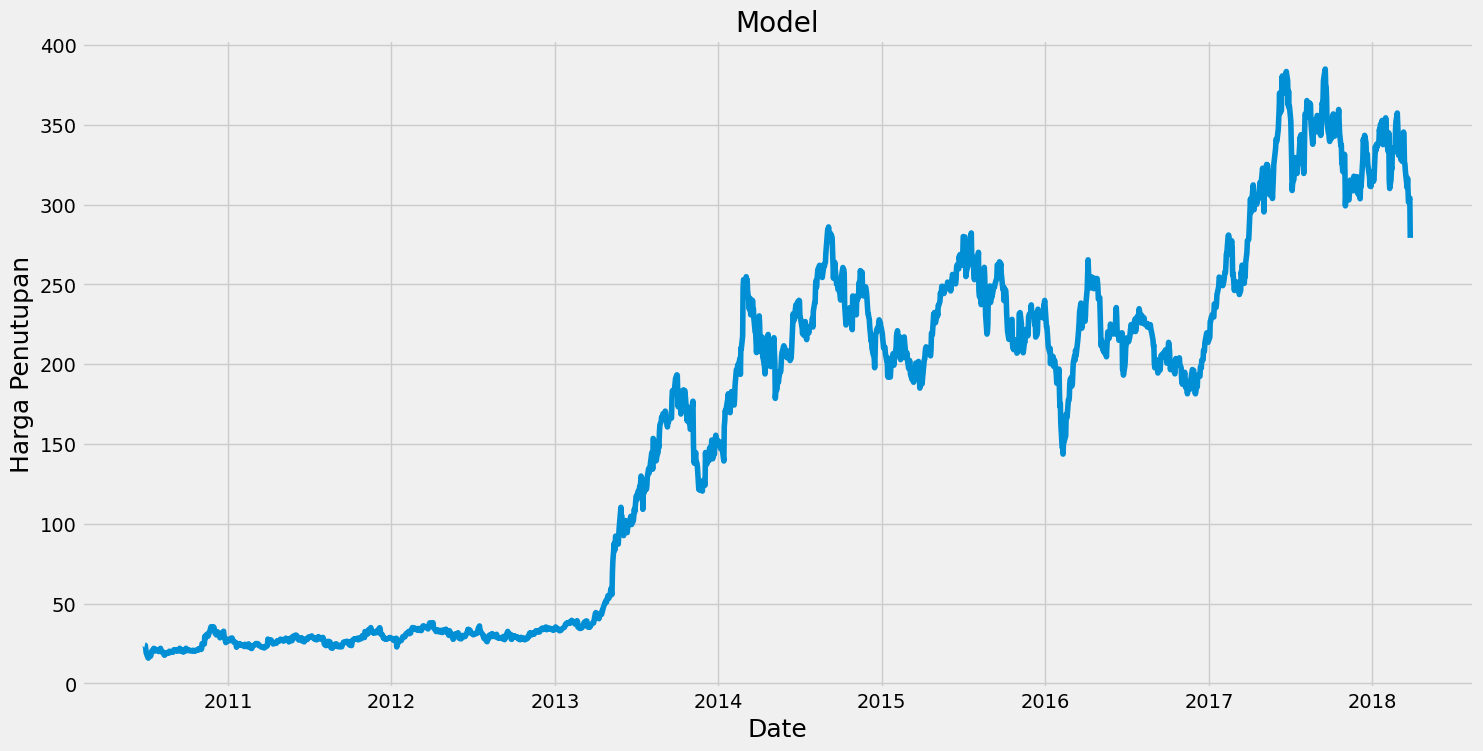

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Harga Penutupan', fontsize=18)
plt.plot(data['Close'])
plt.show()

In [ ]:
data = data.filter(['Close'])
dataset = data.values

#menghitung jumlah baris yang dilatih.
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1560

In [ ]:
#mengukur data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.77394366],
       [0.78109426],
       [0.71338028]])

In [ ]:
#membuat dataset latih
#membuat scaled dataset
train_data = scaled_data[0:training_data_len , :]
#membagi data ke x_train dan y_train dataset
x_train = []
y_train = []
for i in range(80, len(train_data)):
    x_train.append(train_data[i-80:i, 0])
    y_train.append(train_data[i,0])
    if i<=80:
        print(x_train)
        print(y_train)
        print()

[array([0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083965,
       0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
       0.01094258, 0.01107801, 0.01310943, 0.0165493 , 0.01218852,
       0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286566,
       0.01332611, 0.01232394, 0.01121343, 0.01386782, 0.01665764,
       0.01478873, 0.0125948 , 0.01026544, 0.01029252, 0.00874865,
       0.00568797, 0.00487541, 0.00682557, 0.00807151, 0.00907367,
       0.00804442, 0.00809859, 0.00893824, 0.01172806, 0.0092091 ,
       0.01110509, 0.01069881, 0.01056338, 0.01102384, 0.0099675 ,
       0.0125948 , 0.01424702, 0.01421993, 0.01283857, 0.01381365,
       0.01329902, 0.0118364 , 0.01332611, 0.01440953, 0.01673889,
       0.01392199, 0.01199892, 0.01423348, 0.01346154, 0.01102384,
       0.01018418, 0.0116468 , 0.01281148, 0.01516793, 0.01673889,
       0.01247291, 0.01300108, 0.01405742, 0.01440953, 0.01262189,
       0.01254063, 0.01254063, 0.012026  , 0.012026  , 0.0128

In [ ]:
#menghubah x_train dan y_train ke dlan numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1480, 80, 1)

In [ ]:
#membangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(1))

In [ ]:
#Menyusun model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Melatih/Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1480/1480 [==============================] - 55s 35ms/step - loss: 0.0018


In [ ]:
#Membuat Testing Dataset
#Membuat New array yang terdiri dari 'scaled dataset' dari indes 1501 sampai dengan 1975
test_data = scaled_data[training_data_len - 80: , :]

#Membentuk dataset x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(80, len(test_data)):
    x_test.append(test_data[i-80:i, 0])

In [ ]:
#Mengubah data ke bentuk numypy array
x_test = np.array(x_test)

In [ ]:
#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#membuat model prediksi harga
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 18ms/step


In [ ]:
#Menampilkan hasil root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

27.531701570156848

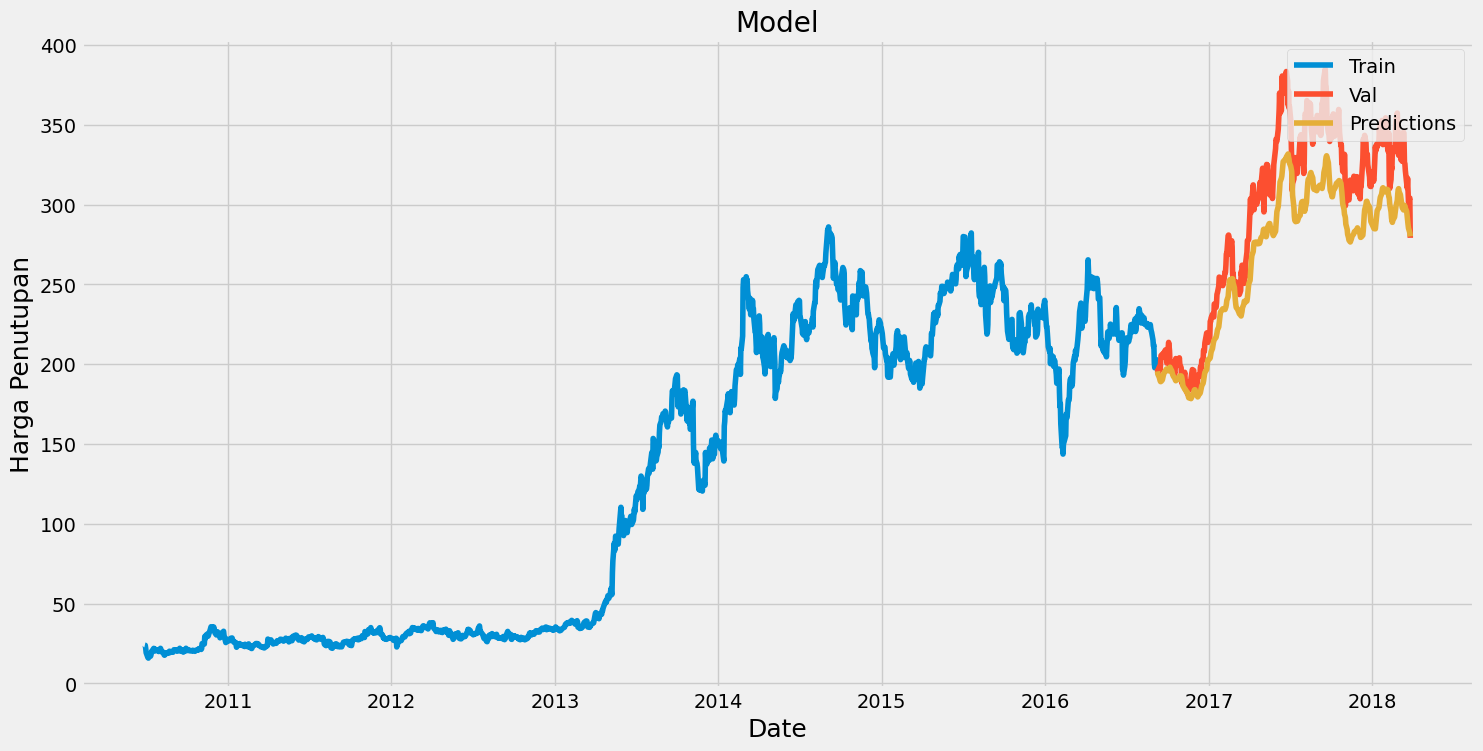

In [ ]:
#Melakukan plot Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Memvisualisasi data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Harga Penutupan', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()